In [52]:
# ============================================================================
# ENERGY PREDICTION APP - RAINFALL & HYDROELECTRIC FOCUS
# ============================================================================
# Group Members:
# 1. N.P.E.Hashan (ITBIN-2211-0192) - Data Understanding & Collection
# 2. H.S.N. Silva (ITBIN-2211-0293) - Data Preprocessing & Cleaning  
# 3. L.K.K.A.M Nawarathna (ITBIN-2211-0241) - Data Visualization & Analysis
# 4. M.A.Shashimantha (ITBIN-2211-0290) - Machine Learning & Modeling
# 5. R.K.R.Jayathissa (ITBIN-2211-0330) - Evaluation & Interpretation
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

# Section 1: Data Understanding & Collection
**Responsible: N.P.E.Hashan (ITBIN-2211-0192)**

Focus on rainfall and hydroelectric production data understanding.

In [53]:
print("="*80)
print("RAINFALL & HYDROELECTRIC DATA UNDERSTANDING")
print("Responsible: N.P.E.Hashan (ITBIN-2211-0192)")
print("="*80)

def load_rainfall_hydroelectric_data():
    """
    Load and understand rainfall and hydroelectric data only
    """
    print("Loading Rainfall and Hydroelectric Dataset...")
    
    # Load the dataset
    df = pd.read_csv('data/sri_lanka_weather_energy_daily.csv')
    
    # Focus only on rainfall and hydroelectric columns
    focus_columns = ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C', 
                    'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h',
                    'Daylight_Duration_s', 'Hydroelectric_Production_GWh']
    
    df_focused = df[focus_columns].copy()
    
    print(f"Focused Dataset Shape: {df_focused.shape}")
    print(f"Focus Columns: {list(df_focused.columns)}")
    
    print("\n--- RAINFALL DATA OVERVIEW ---")
    if 'Average_Rainfall_mm' in df_focused.columns:
        print(df_focused['Average_Rainfall_mm'].describe())
    
    print("\n--- HYDROELECTRIC PRODUCTION OVERVIEW ---")
    if 'Hydroelectric_Production_GWh' in df_focused.columns:
        print(df_focused['Hydroelectric_Production_GWh'].describe())
    
    print("\n--- MISSING VALUES ---")
    missing_values = df_focused.isnull().sum()
    print(missing_values[missing_values > 0])
    
    return df_focused

# Execute data understanding
raw_data = load_rainfall_hydroelectric_data()

RAINFALL & HYDROELECTRIC DATA UNDERSTANDING
Responsible: N.P.E.Hashan (ITBIN-2211-0192)
Loading Rainfall and Hydroelectric Dataset...
Focused Dataset Shape: (4201, 10)
Focus Columns: ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C', 'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s', 'Hydroelectric_Production_GWh']

--- RAINFALL DATA OVERVIEW ---
count    3487.000000
mean        6.397303
std        14.447401
min        -9.999861
25%        -5.399218
50%         5.516324
75%        16.031255
max        98.495493
Name: Average_Rainfall_mm, dtype: float64

--- HYDROELECTRIC PRODUCTION OVERVIEW ---
count    3415.000000
mean        9.992191
std         7.063493
min         0.000093
25%         2.944164
50%        10.000000
75%        17.055836
max        19.999907
Name: Hydroelectric_Production_GWh, dtype: float64

--- MISSING VALUES ---
Average_Rainfall_mm             714
Average_Temperature_C           714
Average_Humidity

DATA UNDERSTANDING & COLLECTION - VISUAL OVERVIEW (Pre-Cleaning)
--- DATA SNAPSHOT ---
Shape: (4201, 10)
Columns: ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C', 'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s', 'Hydroelectric_Production_GWh']
First 5 rows:


,Year,Month,Day,Average_Rainfall_mm,Average_Temperature_C,Average_Humidity_%,Average_Wind_Speed_kmh,Precipitation_Hours_h,Daylight_Duration_s,Hydroelectric_Production_GWh
0,2015,April,1,19.996528,26.107580,84.996528,13.997454,11.997917,43109.837498,19.997685
1,2015,April,2,19.999861,26.021518,84.999861,13.999898,11.999917,43111.675083,19.999907
2,2015,April,3,19.998750,25.935449,84.998750,13.999083,11.999250,43113.496987,19.999167
3,2015,April,4,NaN,NaN,NaN,NaN,NaN,43115.303074,NaN
4,2015,April,5,19.983196,25.763393,84.983196,13.987677,11.989917,43117.093211,19.988797


--- DATA TYPES ---
Year                              int64
Month                            object
Day                               int64
Average_Rainfall_mm             float64
Average_Temperature_C           float64
Average_Humidity_%              float64
Average_Wind_Speed_kmh          float64
Precipitation_Hours_h           float64
Daylight_Duration_s             float64
Hydroelectric_Production_GWh    float64
dtype: object
--- MISSING VALUES (COUNT & %) ---


,missing_count,missing_%
Average_Wind_Speed_kmh,786,18.71
Average_Humidity_%,786,18.71
Precipitation_Hours_h,786,18.71
Hydroelectric_Production_GWh,786,18.71
Average_Temperature_C,714,17.00
Average_Rainfall_mm,714,17.00


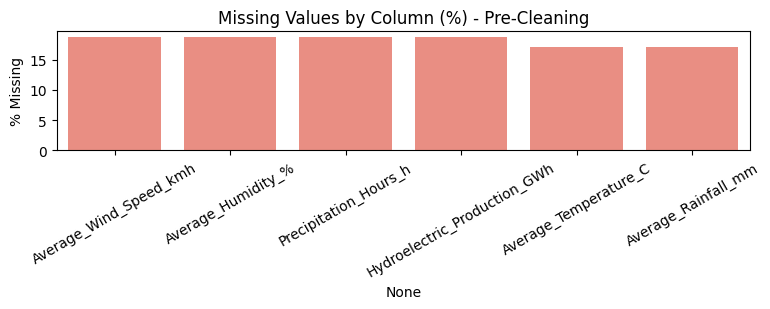

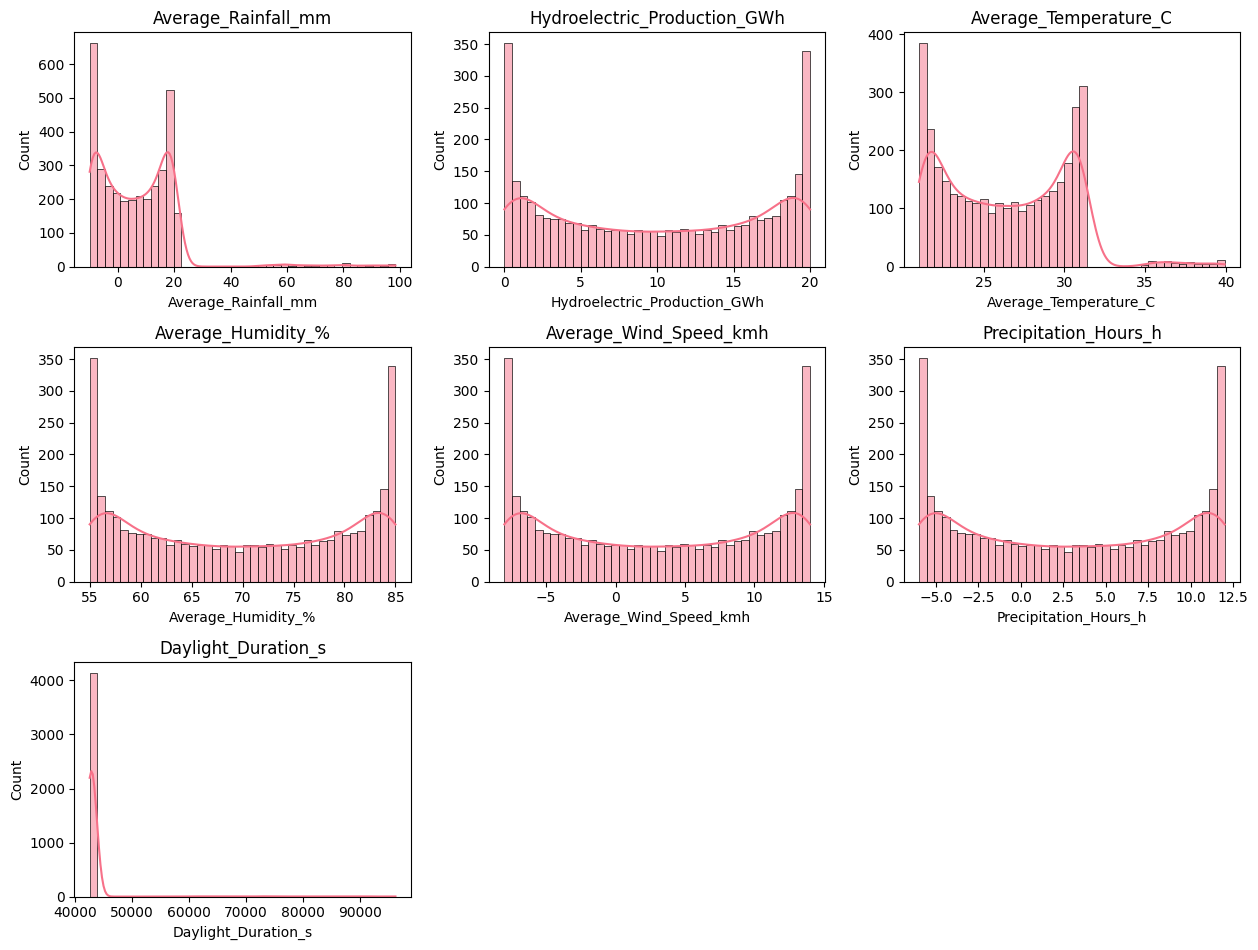

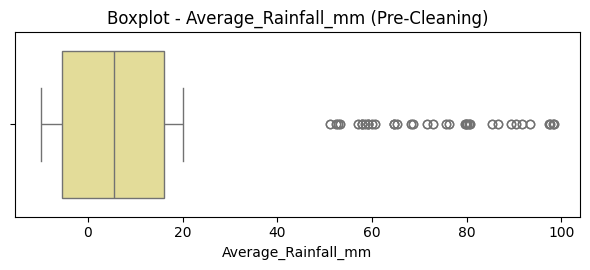

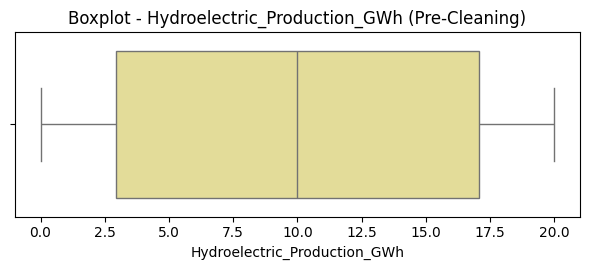

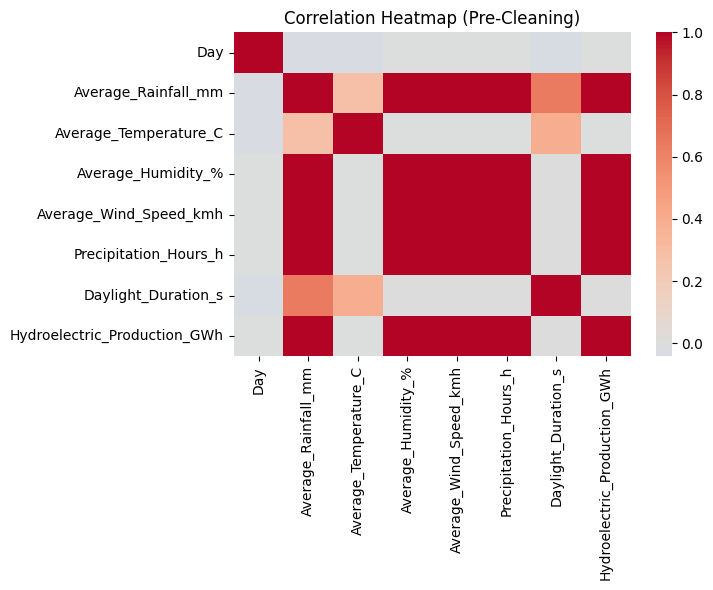

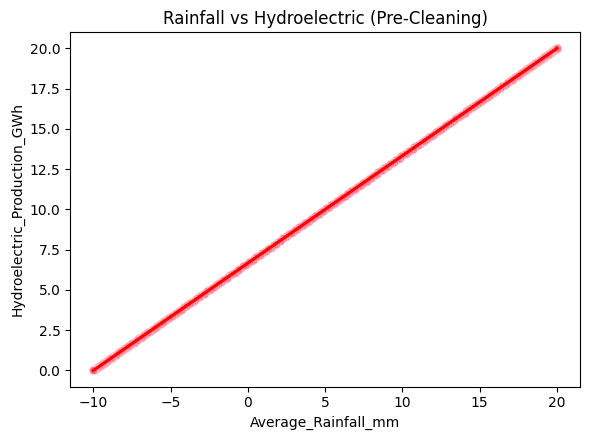

--- NORMALIZATION DEMO (StandardScaler) ---


,mean_before,std_before,mean_after,std_after
Average_Rainfall_mm,4.988287,10.595240,3.329044e-17,1.000146
Hydroelectric_Production_GWh,9.992191,7.063493,-1.997426e-16,1.000146


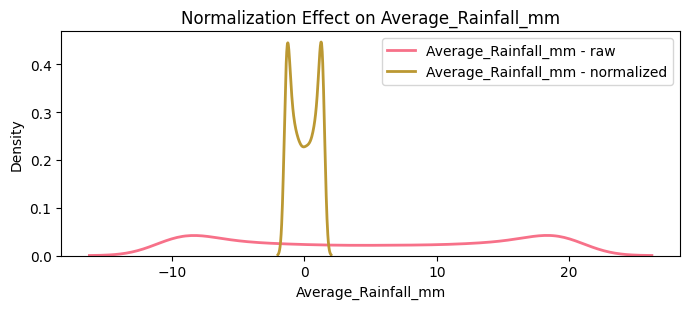

In [54]:
# VISUALIZATION: Data Understanding Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ensure raw_data exists
try:
    raw_data
except NameError:
    try:
        raw_data = load_rainfall_hydroelectric_data()
    except Exception:
        try:
            df_fallback = pd.read_csv('data/sri_lanka_weather_energy_daily.csv')
            focus_columns = ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C',
                             'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h',
                             'Daylight_Duration_s', 'Hydroelectric_Production_GWh']
            raw_data = df_fallback[focus_columns].copy()
        except Exception:
            raise RuntimeError("Could not create 'raw_data'. Please run the data loading cell above.")

print("" + "="*80)
print("DATA UNDERSTANDING & COLLECTION - VISUAL OVERVIEW (Pre-Cleaning)")
print("="*80)

# 1) Basic structure
print("--- DATA SNAPSHOT ---")
print(f"Shape: {raw_data.shape}")
print("Columns:", list(raw_data.columns))
print("First 5 rows:")
try:
    display(raw_data.head())
except Exception:
    print(raw_data.head().to_string(index=False))

print("--- DATA TYPES ---")
print(raw_data.dtypes)

# 2) Missing values overview
print("--- MISSING VALUES (COUNT & %) ---")
na_counts = raw_data.isna().sum()
na_perc = (na_counts / len(raw_data) * 100).round(2)
na_df = pd.DataFrame({"missing_count": na_counts, "missing_%": na_perc})
try:
    display(na_df[na_df.missing_count > 0].sort_values("missing_count", ascending=False))
except Exception:
    print(na_df[na_df.missing_count > 0].sort_values("missing_count", ascending=False))

plt.figure(figsize=(8,3.2))
na_plot = na_perc[na_perc>0].sort_values(ascending=False)
sns.barplot(x=na_plot.index, y=na_plot.values, color="salmon")
plt.title("Missing Values by Column (%) - Pre-Cleaning")
plt.ylabel("% Missing")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3) Distributions of key numeric variables (raw)
num_cols = [c for c in raw_data.select_dtypes(include=[np.number]).columns if c not in ("Year",)]
sel = [c for c in [
    'Average_Rainfall_mm', 'Hydroelectric_Production_GWh', 'Average_Temperature_C',
    'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s'
] if c in num_cols]

cols = 3
rows = int(np.ceil(len(sel)/cols)) or 1
plt.figure(figsize=(cols*4.2, rows*3.2))
for i, col in enumerate(sel, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(raw_data[col].dropna(), kde=True, bins=40)
    plt.title(col)
plt.tight_layout()
plt.show()

# 4) Outlier check via boxplots (rainfall & hydro)
for col in ['Average_Rainfall_mm','Hydroelectric_Production_GWh']:
    if col in raw_data.columns:
        plt.figure(figsize=(6,2.8))
        sns.boxplot(x=raw_data[col].dropna(), color='khaki')
        plt.title(f"Boxplot - {col} (Pre-Cleaning)")
        plt.tight_layout()
        plt.show()

# 5) Correlation heatmap (numeric)
if len(num_cols) >= 2:
    corr = raw_data[num_cols].corr()
    plt.figure(figsize=(7.5,6))
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (Pre-Cleaning)')
    plt.tight_layout()
    plt.show()

# 6) Relationship: Rainfall vs Hydroelectric (raw)
if 'Average_Rainfall_mm' in raw_data.columns and 'Hydroelectric_Production_GWh' in raw_data.columns:
    plt.figure(figsize=(6,4.5))
    sns.scatterplot(data=raw_data, x='Average_Rainfall_mm', y='Hydroelectric_Production_GWh', alpha=0.3)
    sns.regplot(data=raw_data, x='Average_Rainfall_mm', y='Hydroelectric_Production_GWh', scatter=False, color='red')
    plt.title('Rainfall vs Hydroelectric (Pre-Cleaning)')
    plt.tight_layout()
    plt.show()

# 7) Normalization demo (for understanding only - does not modify raw_data)
print("--- NORMALIZATION DEMO (StandardScaler) ---")
demo_cols = [c for c in ['Average_Rainfall_mm','Hydroelectric_Production_GWh'] if c in num_cols]
if demo_cols:
    demo_df = raw_data[demo_cols].dropna().copy()
    scaler = StandardScaler()
    demo_norm = pd.DataFrame(scaler.fit_transform(demo_df), columns=demo_cols)
    before = demo_df.agg(['mean','std']).T.rename(columns={'mean':'mean_before','std':'std_before'})
    after = demo_norm.agg(['mean','std']).T.rename(columns={'mean':'mean_after','std':'std_after'})
    stats = before.join(after)
    try:
        display(stats)
    except Exception:
        print(stats)

    # Overlay distributions before/after for the first column
    c0 = demo_cols[0]
    plt.figure(figsize=(7,3.2))
    sns.kdeplot(demo_df[c0], label=f'{c0} - raw', lw=2)
    sns.kdeplot(demo_norm[c0], label=f'{c0} - normalized', lw=2)
    plt.title(f'Normalization Effect on {c0}')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for normalization demo.")


# Section 2: Data Preprocessing & Cleaning
**Responsible: H.S.N. Silva (ITBIN-2211-0293)**

Clean and preprocess rainfall and hydroelectric data specifically.

In [55]:
print("\n" + "="*80)
print("RAINFALL & HYDROELECTRIC DATA PREPROCESSING")
print("Responsible: H.S.N. Silva (ITBIN-2211-0293)")
print("="*80)

def preprocess_rainfall_hydroelectric_data(df):
    """
    Clean and preprocess rainfall and hydroelectric data
    """
    print("Starting Rainfall & Hydroelectric Data Preprocessing...")
    
    cleaned_df = df.copy()
    
    # Handle date columns
    print("\n--- HANDLING DATE COLUMNS ---")
    if 'Year' in cleaned_df.columns and 'Month' in cleaned_df.columns and 'Day' in cleaned_df.columns:
        month_mapping = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
            'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
        cleaned_df['Month_Numeric'] = cleaned_df['Month'].map(month_mapping)
        cleaned_df['Date'] = pd.to_datetime(cleaned_df[['Year', 'Month_Numeric', 'Day']].rename(columns={'Month_Numeric': 'Month'}))
        print("Date column created successfully")
    
    # Handle missing values for rainfall and hydroelectric specifically
    print("\n--- HANDLING MISSING VALUES ---")
    print(f"Rainfall missing values: {cleaned_df['Average_Rainfall_mm'].isnull().sum()}")
    print(f"Hydroelectric missing values: {cleaned_df['Hydroelectric_Production_GWh'].isnull().sum()}")
    
    # Fill missing values with median
    numeric_columns = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_columns:
        if cleaned_df[col].isnull().sum() > 0:
            median_value = cleaned_df[col].median()
            cleaned_df[col].fillna(median_value, inplace=True)
            print(f"Filled {col} missing values with median: {median_value:.2f}")
    
    # Remove duplicates
    print("\n--- REMOVING DUPLICATES ---")
    duplicates_before = cleaned_df.duplicated().sum()
    cleaned_df = cleaned_df.drop_duplicates()
    print(f"Duplicates removed: {duplicates_before - cleaned_df.duplicated().sum()}")
    
    print(f"Final dataset shape: {cleaned_df.shape}")
    return cleaned_df

# Execute preprocessing
processed_data = preprocess_rainfall_hydroelectric_data(raw_data)


RAINFALL & HYDROELECTRIC DATA PREPROCESSING
Responsible: H.S.N. Silva (ITBIN-2211-0293)
Starting Rainfall & Hydroelectric Data Preprocessing...

--- HANDLING DATE COLUMNS ---
Date column created successfully

--- HANDLING MISSING VALUES ---
Rainfall missing values: 714
Hydroelectric missing values: 786
Filled Average_Rainfall_mm missing values with median: 5.52
Filled Average_Temperature_C missing values with median: 26.28
Filled Average_Humidity_% missing values with median: 70.00
Filled Average_Wind_Speed_kmh missing values with median: 3.00
Filled Precipitation_Hours_h missing values with median: 3.00
Filled Hydroelectric_Production_GWh missing values with median: 10.00

--- REMOVING DUPLICATES ---
Duplicates removed: 183
Final dataset shape: (4018, 12)


DATA PREPROCESSING & CLEANING - VISUAL OVERVIEW (Post-Cleaning)
--- CLEANED DATA SNAPSHOT ---
Shape: (4018, 12)
Columns: ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C', 'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s', 'Hydroelectric_Production_GWh', 'Month_Numeric', 'Date']
First 5 rows:


,Year,Month,Day,Average_Rainfall_mm,Average_Temperature_C,Average_Humidity_%,Average_Wind_Speed_kmh,Precipitation_Hours_h,Daylight_Duration_s,Hydroelectric_Production_GWh,Month_Numeric,Date
0,2015,April,1,19.996528,26.107580,84.996528,13.997454,11.997917,43109.837498,19.997685,4,2015-04-01
1,2015,April,2,19.999861,26.021518,84.999861,13.999898,11.999917,43111.675083,19.999907,4,2015-04-02
2,2015,April,3,19.998750,25.935449,84.998750,13.999083,11.999250,43113.496987,19.999167,4,2015-04-03
3,2015,April,4,5.516324,26.283611,70.000000,3.000000,3.000000,43115.303074,10.000000,4,2015-04-04
4,2015,April,5,19.983196,25.763393,84.983196,13.987677,11.989917,43117.093211,19.988797,4,2015-04-05


--- DATA TYPES (Post-Cleaning) ---
Year                                     int64
Month                                   object
Day                                      int64
Average_Rainfall_mm                    float64
Average_Temperature_C                  float64
Average_Humidity_%                     float64
Average_Wind_Speed_kmh                 float64
Precipitation_Hours_h                  float64
Daylight_Duration_s                    float64
Hydroelectric_Production_GWh           float64
Month_Numeric                            int64
Date                            datetime64[ns]
dtype: object
--- MISSING VALUES AFTER CLEANING (COUNT & %) ---


,missing_count,missing_%


No missing values detected after cleaning.


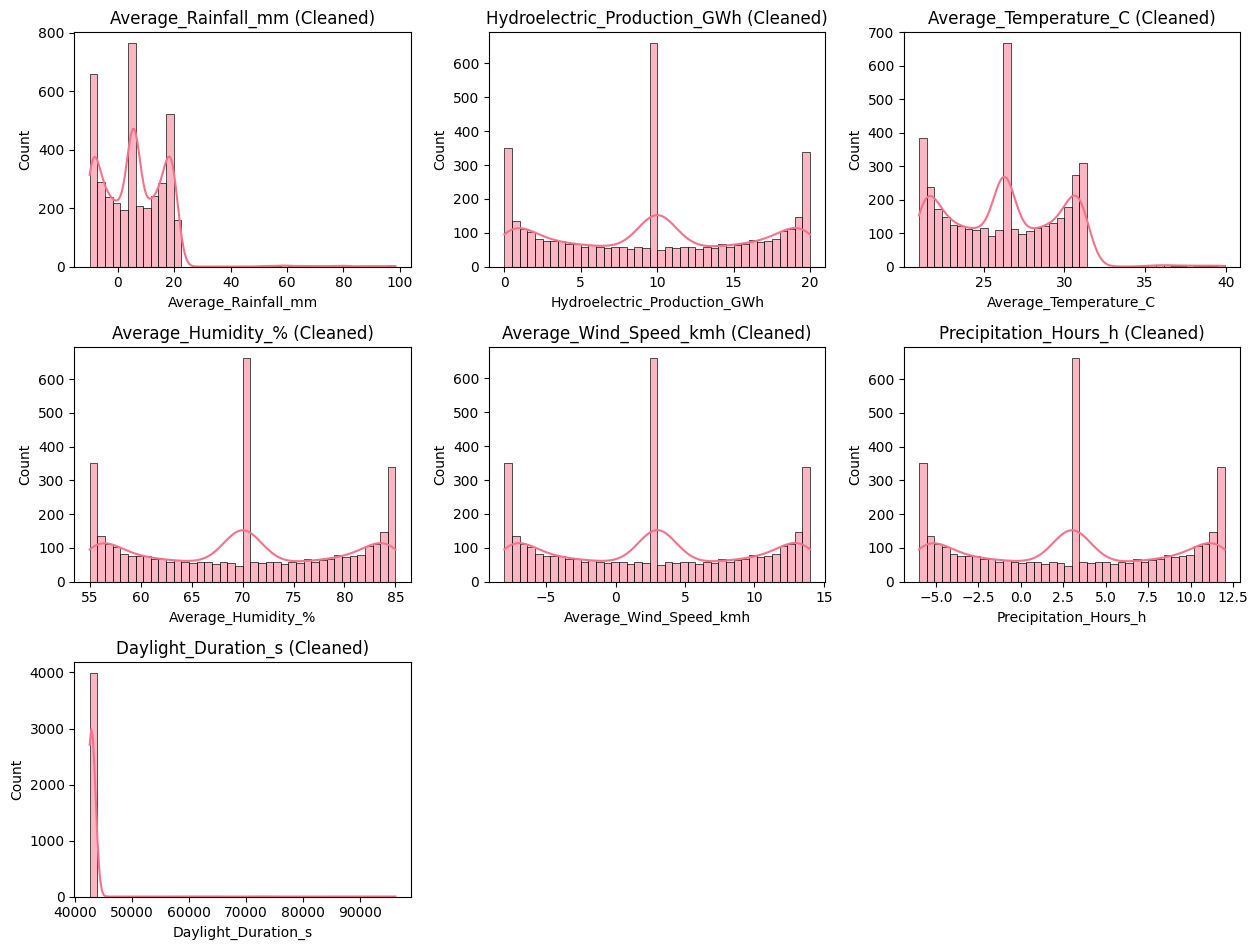

Outliers [Average_Rainfall_mm] by IQR: 36 (thresholds: -31.49, 41.82)


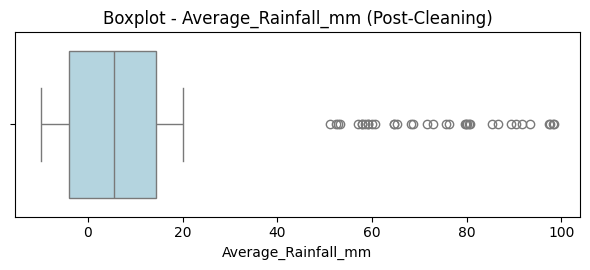

Outliers [Hydroelectric_Production_GWh] by IQR: 0 (thresholds: -14.02, 34.04)


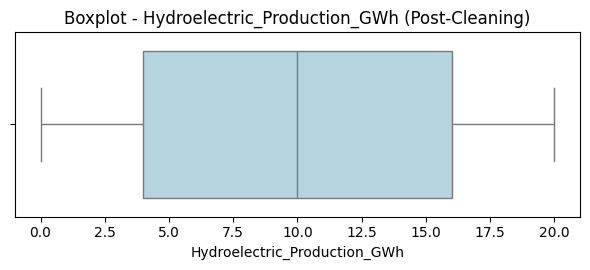

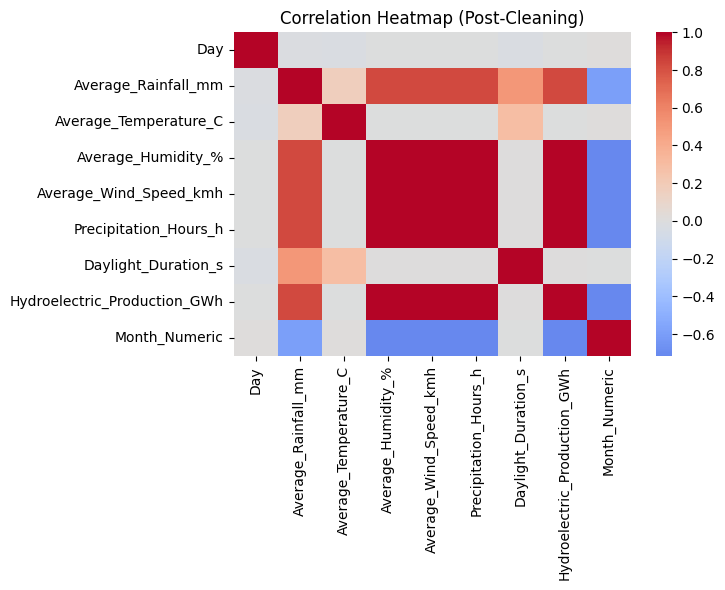

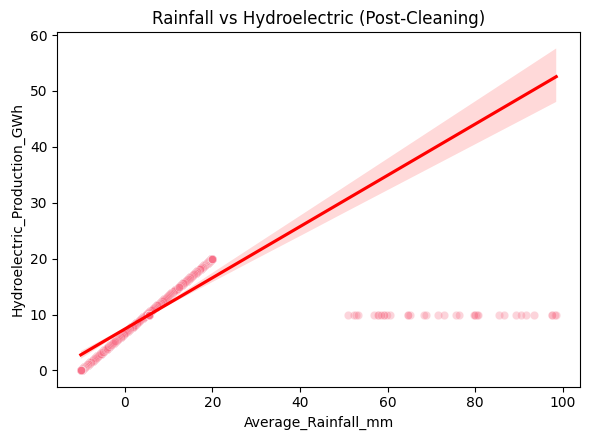

--- NORMALIZATION DEMO (StandardScaler, Post-Cleaning) ---


,mean_before,std_before,mean_after,std_after
Average_Rainfall_mm,5.674204,11.777195,3.890478e-17,1.000124
Hydroelectric_Production_GWh,9.993363,6.511790,5.482037e-17,1.000124


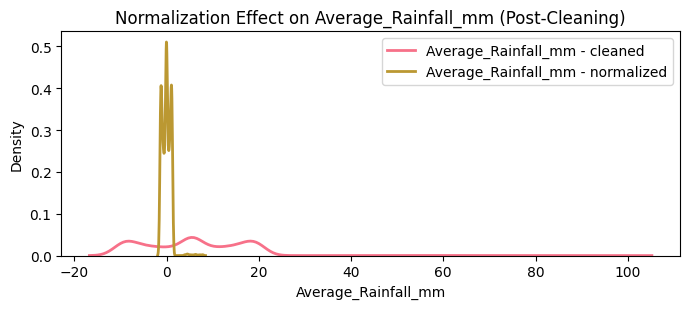

--- BEFORE vs AFTER SUMMARY ---
Missing values: before=4572 after=0
Duplicate rows: before=183 after=0


In [56]:
# VISUALIZATION: Post-Cleaning Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ensure processed_data exists (robust fallbacks)
try:
    processed_data
except NameError:
    try:
        # Try to use provided preprocess function if available
        raw_df_exists = 'raw_data' in globals()
        if not raw_df_exists:
            # construct raw_data from CSV
            rdf = pd.read_csv('data/sri_lanka_weather_energy_daily.csv')
            focus_columns = ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C',
                             'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h',
                             'Daylight_Duration_s', 'Hydroelectric_Production_GWh']
            raw_data = rdf[focus_columns].copy()
        processed_data = preprocess_rainfall_hydroelectric_data(raw_data)
    except Exception:
        # Minimal fallback cleaning pipeline similar to the notebook
        try:
            rdf = pd.read_csv('data/sri_lanka_weather_energy_daily.csv')
            focus_columns = ['Year', 'Month', 'Day', 'Average_Rainfall_mm', 'Average_Temperature_C',
                             'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h',
                             'Daylight_Duration_s', 'Hydroelectric_Production_GWh']
            dfc = rdf[focus_columns].copy()
            # Date columns
            month_mapping = {
                'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
            }
            dfc['Month_Numeric'] = dfc['Month'].map(month_mapping)
            dfc['Date'] = pd.to_datetime(dfc[['Year', 'Month_Numeric', 'Day']].rename(columns={'Month_Numeric': 'Month'}))
            # Fill numeric medians
            for col in dfc.select_dtypes(include=[np.number]).columns:
                if dfc[col].isnull().sum() > 0:
                    dfc[col] = dfc[col].fillna(dfc[col].median())
            # Drop duplicates
            dfc = dfc.drop_duplicates()
            processed_data = dfc
        except Exception:
            raise RuntimeError("Could not create 'processed_data'. Please run the preprocessing cell above.")

print("" + "="*80)
print("DATA PREPROCESSING & CLEANING - VISUAL OVERVIEW (Post-Cleaning)")
print("="*80)

# 1) Snapshot after cleaning
print("--- CLEANED DATA SNAPSHOT ---")
print(f"Shape: {processed_data.shape}")
print("Columns:", list(processed_data.columns))
print("First 5 rows:")
try:
    display(processed_data.head())
except Exception:
    print(processed_data.head().to_string(index=False))

print("--- DATA TYPES (Post-Cleaning) ---")
print(processed_data.dtypes)

# 2) Missing values after cleaning
print("--- MISSING VALUES AFTER CLEANING (COUNT & %) ---")
na_counts = processed_data.isna().sum()
na_perc = (na_counts / len(processed_data) * 100).round(2)
na_df = pd.DataFrame({"missing_count": na_counts, "missing_%": na_perc})
try:
    display(na_df[na_df.missing_count > 0].sort_values("missing_count", ascending=False))
except Exception:
    print(na_df[na_df.missing_count > 0].sort_values("missing_count", ascending=False))

if (na_perc > 0).any():
    plt.figure(figsize=(8,3.2))
    na_plot = na_perc[na_perc>0].sort_values(ascending=False)
    sns.barplot(x=na_plot.index, y=na_plot.values, color="seagreen")
    plt.title("Missing Values by Column (%) - Post-Cleaning")
    plt.ylabel("% Missing")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected after cleaning.")

# 3) Distribution after cleaning
num_cols = [c for c in processed_data.select_dtypes(include=[np.number]).columns if c not in ("Year",)]
sel = [c for c in [
    'Average_Rainfall_mm', 'Hydroelectric_Production_GWh', 'Average_Temperature_C',
    'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s'
] if c in num_cols]

cols = 3
rows = int(np.ceil(len(sel)/cols)) or 1
plt.figure(figsize=(cols*4.2, rows*3.2))
for i, col in enumerate(sel, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(processed_data[col].dropna(), kde=True, bins=40)
    plt.title(f"{col} (Cleaned)")
plt.tight_layout()
plt.show()

# 4) Outlier counts (IQR method)
def iqr_outliers(s):
    q1, q3 = np.nanpercentile(s, 25), np.nanpercentile(s, 75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < low) | (s > high)
    return int(mask.sum()), float(low), float(high)

for col in ['Average_Rainfall_mm','Hydroelectric_Production_GWh']:
    if col in processed_data.columns:
        cnt, low, high = iqr_outliers(processed_data[col].values)
        print(f"Outliers [{col}] by IQR: {cnt} (thresholds: {low:.2f}, {high:.2f})")
        plt.figure(figsize=(6,2.8))
        sns.boxplot(x=processed_data[col].dropna(), color='lightblue')
        plt.title(f"Boxplot - {col} (Post-Cleaning)")
        plt.tight_layout()
        plt.show()

# 5) Correlation heatmap after cleaning
if len(num_cols) >= 2:
    corr = processed_data[num_cols].corr()
    plt.figure(figsize=(7.5,6))
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (Post-Cleaning)')
    plt.tight_layout()
    plt.show()

# 6) Relationship after cleaning: Rainfall vs Hydroelectric
if 'Average_Rainfall_mm' in processed_data.columns and 'Hydroelectric_Production_GWh' in processed_data.columns:
    plt.figure(figsize=(6,4.5))
    sns.scatterplot(data=processed_data, x='Average_Rainfall_mm', y='Hydroelectric_Production_GWh', alpha=0.3)
    sns.regplot(data=processed_data, x='Average_Rainfall_mm', y='Hydroelectric_Production_GWh', scatter=False, color='red')
    plt.title('Rainfall vs Hydroelectric (Post-Cleaning)')
    plt.tight_layout()
    plt.show()

# 7) Normalization demo (post-cleaning)
print("--- NORMALIZATION DEMO (StandardScaler, Post-Cleaning) ---")
demo_cols = [c for c in ['Average_Rainfall_mm','Hydroelectric_Production_GWh'] if c in num_cols]
if demo_cols:
    demo_df = processed_data[demo_cols].dropna().copy()
    scaler = StandardScaler()
    demo_norm = pd.DataFrame(scaler.fit_transform(demo_df), columns=demo_cols)
    before = demo_df.agg(['mean','std']).T.rename(columns={'mean':'mean_before','std':'std_before'})
    after = demo_norm.agg(['mean','std']).T.rename(columns={'mean':'mean_after','std':'std_after'})
    stats = before.join(after)
    try:
        display(stats)
    except Exception:
        print(stats)

    c0 = demo_cols[0]
    plt.figure(figsize=(7,3.2))
    sns.kdeplot(demo_df[c0], label=f'{c0} - cleaned', lw=2)
    sns.kdeplot(demo_norm[c0], label=f'{c0} - normalized', lw=2)
    plt.title(f'Normalization Effect on {c0} (Post-Cleaning)')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for normalization demo.")

# 8) Optional: Before vs After quick summary (if raw_data exists)
if 'raw_data' in globals():
    print("--- BEFORE vs AFTER SUMMARY ---")
    try:
        raw_na = raw_data.isna().sum().sum()
    except Exception:
        raw_na = np.nan
    proc_na = processed_data.isna().sum().sum()
    print(f"Missing values: before={raw_na} after={proc_na}")
    try:
        raw_dups = raw_data.duplicated().sum()
        proc_dups = processed_data.duplicated().sum()
        print(f"Duplicate rows: before={raw_dups} after={proc_dups}")
    except Exception:
        pass


# Section 3: Rainfall Distribution Analysis
**Responsible: L.K.K.A.M Nawarathna (ITBIN-2211-0241)**

Analyze rainfall distribution patterns only.

In [57]:
print("\n" + "="*80)
print("RAINFALL DISTRIBUTION ANALYSIS")
print("Responsible: L.K.K.A.M Nawarathna (ITBIN-2211-0241)")
print("="*80)

def analyze_rainfall_distribution(df):
    """
    Analyze rainfall distribution patterns
    """
    print("Analyzing Rainfall Distribution...")
    
    if 'Average_Rainfall_mm' not in df.columns:
        print("No rainfall data available")
        return df
    
    # Rainfall statistics
    print("\n--- RAINFALL DISTRIBUTION STATISTICS ---")
    rainfall_stats = df['Average_Rainfall_mm'].describe()
    print(rainfall_stats)
    
    # Additional statistics
    print(f"\nAdditional Rainfall Statistics:")
    print(f"Skewness: {df['Average_Rainfall_mm'].skew():.4f}")
    print(f"Kurtosis: {df['Average_Rainfall_mm'].kurtosis():.4f}")
    
    # Rainfall categories
    print("\n--- RAINFALL CATEGORIES ---")
    df['Rainfall_Category'] = pd.cut(df['Average_Rainfall_mm'], 
                                    bins=[-float('inf'), 0, 5, 10, 20, float('inf')],
                                    labels=['Very Low (<0mm)', 'Low (0-5mm)', 'Medium (5-10mm)', 
                                           'High (10-20mm)', 'Very High (>20mm)'])
    
    category_counts = df['Rainfall_Category'].value_counts()
    print(category_counts)
    
    # Monthly rainfall patterns
    print("\n--- MONTHLY RAINFALL PATTERNS ---")
    if 'Month' in df.columns:
        monthly_rainfall = df.groupby('Month')['Average_Rainfall_mm'].agg(['mean', 'median', 'std'])
        print(monthly_rainfall)
    
    return df

# Execute rainfall analysis
processed_data = analyze_rainfall_distribution(processed_data)


RAINFALL DISTRIBUTION ANALYSIS
Responsible: L.K.K.A.M Nawarathna (ITBIN-2211-0241)
Analyzing Rainfall Distribution...

--- RAINFALL DISTRIBUTION STATISTICS ---
count    4018.000000
mean        5.674204
std        11.777195
min        -9.999861
25%        -3.998496
50%         5.516324
75%        14.330701
max        98.495493
Name: Average_Rainfall_mm, dtype: float64

Additional Rainfall Statistics:
Skewness: 1.8243
Kurtosis: 10.5405

--- RAINFALL CATEGORIES ---
Rainfall_Category
Very Low (<0mm)      1340
High (10-20mm)       1335
Medium (5-10mm)       934
Low (0-5mm)           373
Very High (>20mm)      36
Name: count, dtype: int64

--- MONTHLY RAINFALL PATTERNS ---
                mean     median        std
Month                                     
April      18.723763  19.342991  10.122918
August     -3.876409  -5.211601   4.220030
December    2.859735   1.923433   8.331929
February   14.676591  15.116654   7.436453
January     8.873877   8.580091   4.629944
July        2.697274  

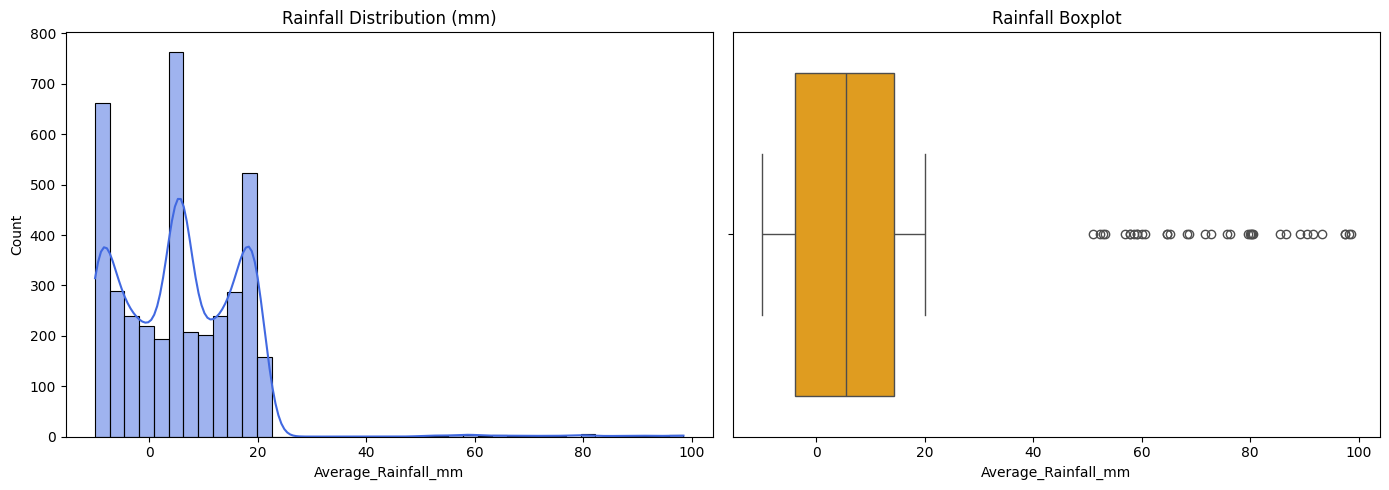

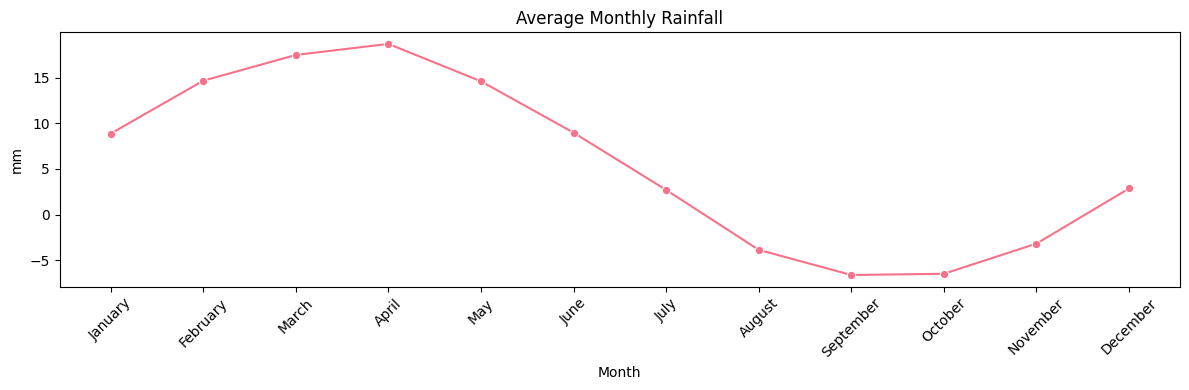

In [58]:
# VISUALIZATION: Rainfall Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribution and boxplot
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(processed_data['Average_Rainfall_mm'], kde=True, ax=axes[0], bins=40, color='royalblue')
axes[0].set_title('Rainfall Distribution (mm)')
axes[0].set_xlabel('Average_Rainfall_mm')

sns.boxplot(x=processed_data['Average_Rainfall_mm'], ax=axes[1], color='orange')
axes[1].set_title('Rainfall Boxplot')
axes[1].set_xlabel('Average_Rainfall_mm')
plt.tight_layout()
plt.show()

# Monthly rainfall patterns (ordered by calendar)
if 'Month' in processed_data.columns:
    order = ['January','February','March','April','May','June','July','August','September','October','November','December']
    monthly = processed_data.groupby('Month')['Average_Rainfall_mm'].mean().reindex(order)
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
    plt.title('Average Monthly Rainfall')
    plt.ylabel('mm')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Section 4: Hydroelectric Production Analysis
**Responsible: L.K.K.A.M Nawarathna (ITBIN-2211-0241)**

Analyze hydroelectric production patterns only.

In [59]:
print("\n" + "="*80)
print("HYDROELECTRIC PRODUCTION ANALYSIS")
print("Responsible: L.K.K.A.M Nawarathna (ITBIN-2211-0241)")
print("="*80)

def analyze_hydroelectric_production(df):
    """
    Analyze hydroelectric production patterns
    """
    print("Analyzing Hydroelectric Production...")
    
    if 'Hydroelectric_Production_GWh' not in df.columns:
        print("No hydroelectric data available")
        return df
    
    # Hydroelectric production statistics
    print("\n--- HYDROELECTRIC PRODUCTION STATISTICS ---")
    hydro_stats = df['Hydroelectric_Production_GWh'].describe()
    print(hydro_stats)
    
    # Additional statistics
    print(f"\nAdditional Hydroelectric Statistics:")
    print(f"Skewness: {df['Hydroelectric_Production_GWh'].skew():.4f}")
    print(f"Kurtosis: {df['Hydroelectric_Production_GWh'].kurtosis():.4f}")
    
    # Production categories
    print("\n--- HYDROELECTRIC PRODUCTION CATEGORIES ---")
    df['Hydro_Category'] = pd.cut(df['Hydroelectric_Production_GWh'], 
                                 bins=[0, 5, 10, 15, 20],
                                 labels=['Low (0-5 GWh)', 'Medium (5-10 GWh)', 
                                        'High (10-15 GWh)', 'Very High (15-20 GWh)'])
    
    category_counts = df['Hydro_Category'].value_counts()
    print(category_counts)
    
    # Monthly hydroelectric patterns
    print("\n--- MONTHLY HYDROELECTRIC PATTERNS ---")
    if 'Month' in df.columns:
        monthly_hydro = df.groupby('Month')['Hydroelectric_Production_GWh'].agg(['mean', 'median', 'std'])
        print(monthly_hydro)
    
    # Rainfall-Hydroelectric relationship
    print("\n--- RAINFALL-HYDROELECTRIC RELATIONSHIP ---")
    if 'Average_Rainfall_mm' in df.columns:
        correlation = df['Average_Rainfall_mm'].corr(df['Hydroelectric_Production_GWh'])
        print(f"Correlation coefficient: {correlation:.4f}")
        
        # Analyze production by rainfall levels
        rainfall_hydro_analysis = df.groupby('Rainfall_Category')['Hydroelectric_Production_GWh'].agg(['mean', 'median', 'count'])
        print("\nHydroelectric Production by Rainfall Category:")
        print(rainfall_hydro_analysis)
    
    return df

# Execute hydroelectric analysis
processed_data = analyze_hydroelectric_production(processed_data)


HYDROELECTRIC PRODUCTION ANALYSIS
Responsible: L.K.K.A.M Nawarathna (ITBIN-2211-0241)
Analyzing Hydroelectric Production...

--- HYDROELECTRIC PRODUCTION STATISTICS ---
count    4018.000000
mean        9.993363
std         6.511790
min         0.000093
25%         4.001003
50%        10.000000
75%        16.016241
max        19.999907
Name: Hydroelectric_Production_GWh, dtype: float64

Additional Hydroelectric Statistics:
Skewness: 0.0013
Kurtosis: -1.2319

--- HYDROELECTRIC PRODUCTION CATEGORIES ---
Hydro_Category
Medium (5-10 GWh)        1175
Low (0-5 GWh)            1141
Very High (15-20 GWh)    1139
High (10-15 GWh)          563
Name: count, dtype: int64

--- MONTHLY HYDROELECTRIC PATTERNS ---
                mean     median       std
Month                                    
April      18.163287  19.536810  3.392334
August      4.030913   3.192266  2.698786
December    7.918062   7.948955  1.622446
February   15.849770  16.616346  2.781450
January    12.321364  12.219215  1.66895

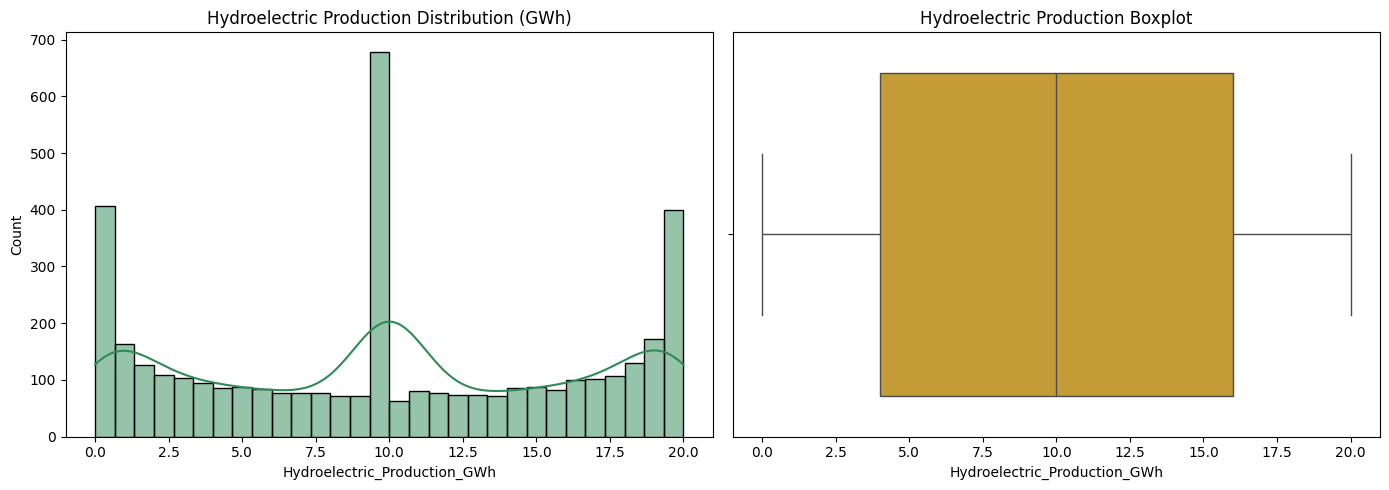

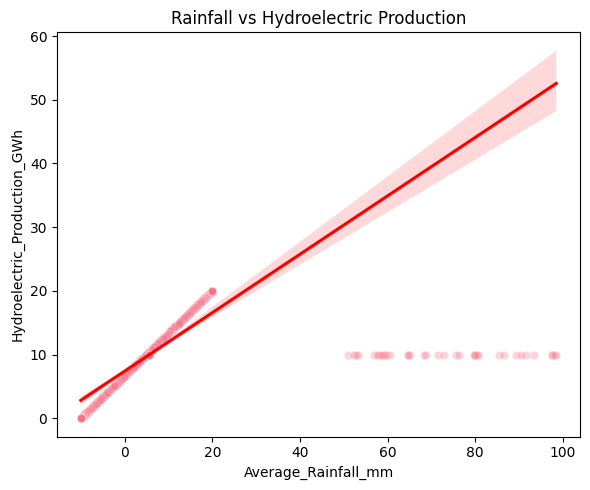

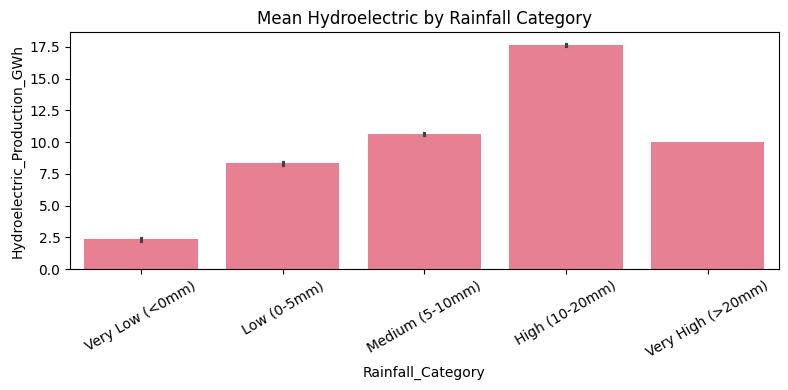

In [60]:
# VISUALIZATION: Hydroelectric Production
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribution and boxplot
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(processed_data['Hydroelectric_Production_GWh'], kde=True, ax=axes[0], bins=30, color='seagreen')
axes[0].set_title('Hydroelectric Production Distribution (GWh)')
axes[0].set_xlabel('Hydroelectric_Production_GWh')

sns.boxplot(x=processed_data['Hydroelectric_Production_GWh'], ax=axes[1], color='goldenrod')
axes[1].set_title('Hydroelectric Production Boxplot')
axes[1].set_xlabel('Hydroelectric_Production_GWh')
plt.tight_layout()
plt.show()

# Rainfall vs Hydroelectric
if 'Average_Rainfall_mm' in processed_data.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=processed_data, x='Average_Rainfall_mm', y='Hydroelectric_Production_GWh', alpha=0.3)
    sns.regplot(data=processed_data, x='Average_Rainfall_mm', y='Hydroelectric_Production_GWh', scatter=False, color='red')
    plt.title('Rainfall vs Hydroelectric Production')
    plt.tight_layout()
    plt.show()

# Hydroelectric by Rainfall Category
if 'Rainfall_Category' in processed_data.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(data=processed_data, x='Rainfall_Category', y='Hydroelectric_Production_GWh', estimator=np.mean, errorbar=('ci',95))
    plt.title('Mean Hydroelectric by Rainfall Category')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


# Section 5: Rainfall Distribution Prediction Modeling
**Responsible: M.A.Shashimantha (ITBIN-2211-0290)**

Build models to predict rainfall distribution patterns.

In [61]:
print("\n" + "="*80)
print("RAINFALL DISTRIBUTION PREDICTION MODELING")
print("Responsible: M.A.Shashimantha (ITBIN-2211-0290)")
print("="*80)

def build_rainfall_prediction_models(df):
    """
    Build models to predict rainfall
    """
    print("Building Rainfall Prediction Models...")
    
    # Features for rainfall prediction (excluding rainfall itself)
    feature_columns = ['Average_Temperature_C', 'Average_Humidity_%', 
                      'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s']
    
    available_features = [col for col in feature_columns if col in df.columns]
    target = 'Average_Rainfall_mm'
    
    print(f"Features for rainfall prediction: {available_features}")
    print(f"Target variable: {target}")
    
    # Prepare data
    X = df[available_features].copy()
    y = df[target].copy()
    
    # Handle missing values
    X = X.fillna(X.median())
    y = y.fillna(y.median())
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    
    # Normalize features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    rainfall_model_results = {}
    
    print(f"\n--- TRAINING MODELS FOR RAINFALL PREDICTION ---")
    
    for name, model in models.items():
        print(f"Training {name} for rainfall prediction...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        rainfall_model_results[name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'y_test': y_test,
            'y_pred': y_test_pred
        }
        
        print(f"  Train R²: {train_r2:.4f}")
        print(f"  Test R²: {test_r2:.4f}")
        print(f"  Test RMSE: {test_rmse:.4f} mm")
        print(f"  Test MAE: {test_mae:.4f} mm")
    
    return rainfall_model_results, scaler, available_features

# Execute rainfall modeling
rainfall_models, rainfall_scaler, rainfall_features = build_rainfall_prediction_models(processed_data)


RAINFALL DISTRIBUTION PREDICTION MODELING
Responsible: M.A.Shashimantha (ITBIN-2211-0290)
Building Rainfall Prediction Models...
Features for rainfall prediction: ['Average_Temperature_C', 'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s']
Target variable: Average_Rainfall_mm
Feature matrix shape: (4018, 5)
Target vector shape: (4018,)

--- TRAINING MODELS FOR RAINFALL PREDICTION ---
Training Linear Regression for rainfall prediction...
  Train R²: 0.9525
  Test R²: 0.9611
  Test RMSE: 2.2521 mm
  Test MAE: 0.5757 mm
Training Random Forest for rainfall prediction...
  Train R²: 0.9968
  Test R²: 0.9841
  Test RMSE: 1.4389 mm
  Test MAE: 0.0973 mm
Training Gradient Boosting for rainfall prediction...
  Train R²: 0.9992
  Test R²: 0.9725
  Test RMSE: 1.8923 mm
  Test MAE: 0.2355 mm


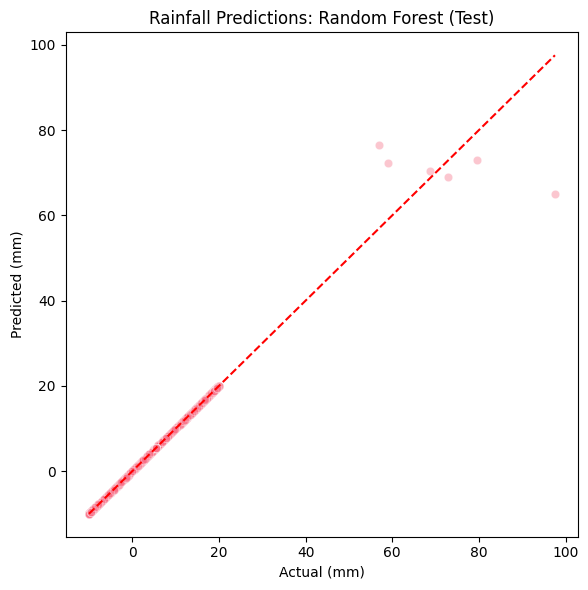

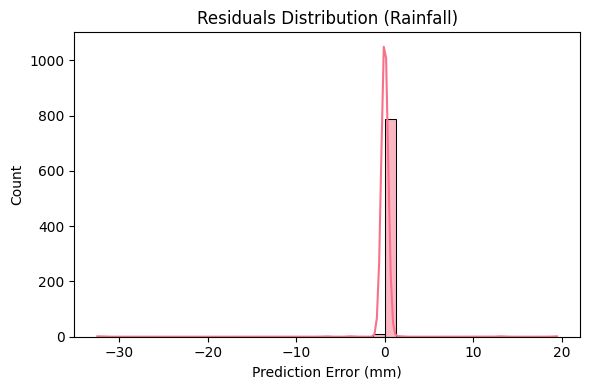

In [62]:
# VISUALIZATION: Rainfall Predictions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

best_name = max(rainfall_models, key=lambda k: rainfall_models[k]['test_r2'])
res = rainfall_models[best_name]
y_true = res['y_test']
y_pred = res['y_pred']

# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
minv = min(np.min(y_true), np.min(y_pred))
maxv = max(np.max(y_true), np.max(y_pred))
plt.plot([minv, maxv],[minv, maxv],'r--')
plt.title(f'Rainfall Predictions: {best_name} (Test)')
plt.xlabel('Actual (mm)')
plt.ylabel('Predicted (mm)')
plt.tight_layout()
plt.show()

# Residuals
resid = y_pred - y_true
plt.figure(figsize=(6,4))
sns.histplot(resid, bins=40, kde=True)
plt.title('Residuals Distribution (Rainfall)')
plt.xlabel('Prediction Error (mm)')
plt.tight_layout()
plt.show()


# Section 6: Hydroelectric Production Prediction Modeling
**Responsible: M.A.Shashimantha (ITBIN-2211-0290)**

Build models to predict hydroelectric production using rainfall and weather data.

In [63]:
print("\n" + "="*80)
print("HYDROELECTRIC PRODUCTION PREDICTION MODELING")
print("Responsible: M.A.Shashimantha (ITBIN-2211-0290)")
print("="*80)

def build_hydroelectric_prediction_models(df):
    """
    Build models to predict hydroelectric production
    """
    print("Building Hydroelectric Production Prediction Models...")
    
    # Features for hydroelectric prediction (including rainfall)
    feature_columns = ['Average_Rainfall_mm', 'Average_Temperature_C', 'Average_Humidity_%', 
                      'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s']
    
    available_features = [col for col in feature_columns if col in df.columns]
    target = 'Hydroelectric_Production_GWh'
    
    print(f"Features for hydroelectric prediction: {available_features}")
    print(f"Target variable: {target}")
    
    # Prepare data
    X = df[available_features].copy()
    y = df[target].copy()
    
    # Handle missing values
    X = X.fillna(X.median())
    y = y.fillna(y.median())
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    
    # Normalize features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    hydro_model_results = {}
    
    print(f"\n--- TRAINING MODELS FOR HYDROELECTRIC PREDICTION ---")
    
    for name, model in models.items():
        print(f"Training {name} for hydroelectric prediction...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        hydro_model_results[name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'y_test': y_test,
            'y_pred': y_test_pred
        }
        
        print(f"  Train R²: {train_r2:.4f}")
        print(f"  Test R²: {test_r2:.4f}")
        print(f"  Test RMSE: {test_rmse:.4f} GWh")
        print(f"  Test MAE: {test_mae:.4f} GWh")
    
    # Feature importance for best model
    best_model_name = max(hydro_model_results.keys(), key=lambda x: hydro_model_results[x]['test_r2'])
    print(f"\n--- FEATURE IMPORTANCE FOR HYDROELECTRIC PREDICTION ---")
    print(f"Best Model: {best_model_name}")
    
    if 'Random Forest' in hydro_model_results:
        rf_model = hydro_model_results['Random Forest']['model']
        importances = rf_model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': available_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        print("Feature Importance for Hydroelectric Production:")
        for idx, row in feature_importance.iterrows():
            print(f"  {row['Feature']:25s}: {row['Importance']:.4f}")
    
    return hydro_model_results, scaler, available_features

# Execute hydroelectric modeling
hydro_models, hydro_scaler, hydro_features = build_hydroelectric_prediction_models(processed_data)


HYDROELECTRIC PRODUCTION PREDICTION MODELING
Responsible: M.A.Shashimantha (ITBIN-2211-0290)
Building Hydroelectric Production Prediction Models...
Features for hydroelectric prediction: ['Average_Rainfall_mm', 'Average_Temperature_C', 'Average_Humidity_%', 'Average_Wind_Speed_kmh', 'Precipitation_Hours_h', 'Daylight_Duration_s']
Target variable: Hydroelectric_Production_GWh
Feature matrix shape: (4018, 6)
Target vector shape: (4018,)

--- TRAINING MODELS FOR HYDROELECTRIC PREDICTION ---
Training Linear Regression for hydroelectric prediction...
  Train R²: 1.0000
  Test R²: 1.0000
  Test RMSE: 0.0000 GWh
  Test MAE: 0.0000 GWh
Training Random Forest for hydroelectric prediction...
  Train R²: 1.0000
  Test R²: 1.0000
  Test RMSE: 0.0010 GWh
  Test MAE: 0.0003 GWh
Training Gradient Boosting for hydroelectric prediction...
  Train R²: 1.0000
  Test R²: 1.0000
  Test RMSE: 0.0360 GWh
  Test MAE: 0.0236 GWh

--- FEATURE IMPORTANCE FOR HYDROELECTRIC PREDICTION ---
Best Model: Linear Regre

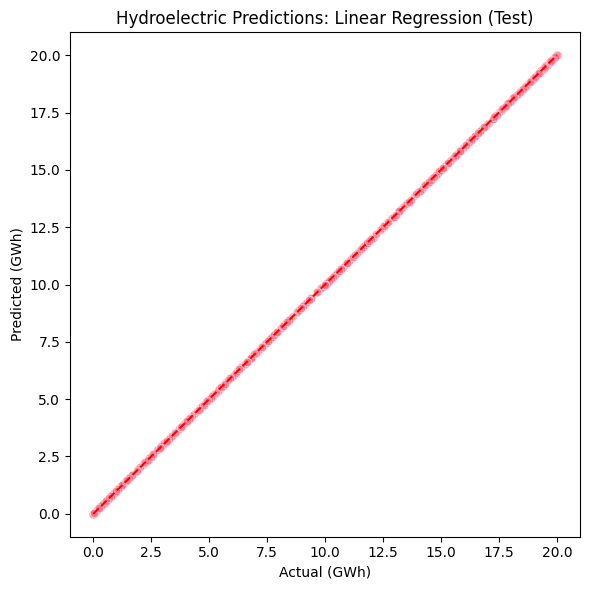

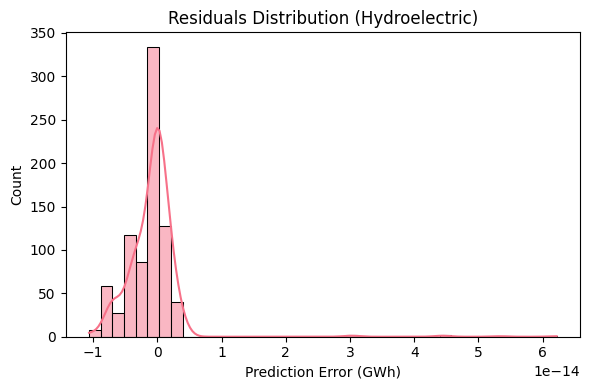

In [64]:
# VISUALIZATION: Hydroelectric Predictions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

best_name = max(hydro_models, key=lambda k: hydro_models[k]['test_r2'])
res = hydro_models[best_name]
y_true = res['y_test']
y_pred = res['y_pred']

# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
minv = min(np.min(y_true), np.min(y_pred))
maxv = max(np.max(y_true), np.max(y_pred))
plt.plot([minv, maxv],[minv, maxv],'r--')
plt.title(f'Hydroelectric Predictions: {best_name} (Test)')
plt.xlabel('Actual (GWh)')
plt.ylabel('Predicted (GWh)')
plt.tight_layout()
plt.show()

# Residuals
resid = y_pred - y_true
plt.figure(figsize=(6,4))
sns.histplot(resid, bins=40, kde=True)
plt.title('Residuals Distribution (Hydroelectric)')
plt.xlabel('Prediction Error (GWh)')
plt.tight_layout()
plt.show()


# Section 7: Evaluation & Interpretation
**Responsible: R.K.R.Jayathissa (ITBIN-2211-0330)**

Evaluate rainfall and hydroelectric prediction models and provide insights.

In [65]:
print("\n" + "="*80)
print("RAINFALL & HYDROELECTRIC PREDICTION EVALUATION")
print("Responsible: R.K.R.Jayathissa (ITBIN-2211-0330)")
print("="*80)

def evaluate_rainfall_models(rainfall_models):
    """
    Evaluate rainfall prediction models
    """
    print("Evaluating Rainfall Prediction Models...")
    
    print("\n--- RAINFALL MODEL PERFORMANCE ---")
    for model_name, results in rainfall_models.items():
        print(f"{model_name}:")
        print(f"  Test R²: {results['test_r2']:.4f} ({results['test_r2']*100:.2f}%)")
        print(f"  Test RMSE: {results['test_rmse']:.4f} mm")
        print(f"  Test MAE: {results['test_mae']:.4f} mm")
    
    # Find best rainfall model
    best_rainfall_model = max(rainfall_models.keys(), key=lambda x: rainfall_models[x]['test_r2'])
    best_rainfall_r2 = rainfall_models[best_rainfall_model]['test_r2']
    
    print(f"\nBest Rainfall Prediction Model: {best_rainfall_model}")
    print(f"Best Rainfall Model Accuracy: {best_rainfall_r2:.4f} ({best_rainfall_r2*100:.2f}%)")
    
    return best_rainfall_model, rainfall_models[best_rainfall_model]

def evaluate_hydroelectric_models(hydro_models):
    """
    Evaluate hydroelectric prediction models
    """
    print("\nEvaluating Hydroelectric Prediction Models...")
    
    print("\n--- HYDROELECTRIC MODEL PERFORMANCE ---")
    for model_name, results in hydro_models.items():
        print(f"{model_name}:")
        print(f"  Test R²: {results['test_r2']:.4f} ({results['test_r2']*100:.2f}%)")
        print(f"  Test RMSE: {results['test_rmse']:.4f} GWh")
        print(f"  Test MAE: {results['test_mae']:.4f} GWh")
    
    # Find best hydroelectric model
    best_hydro_model = max(hydro_models.keys(), key=lambda x: hydro_models[x]['test_r2'])
    best_hydro_r2 = hydro_models[best_hydro_model]['test_r2']
    
    print(f"\nBest Hydroelectric Prediction Model: {best_hydro_model}")
    print(f"Best Hydroelectric Model Accuracy: {best_hydro_r2:.4f} ({best_hydro_r2*100:.2f}%)")
    
    return best_hydro_model, hydro_models[best_hydro_model]

def generate_prediction_insights(rainfall_models, hydro_models, df):
    """
    Generate insights for rainfall and hydroelectric predictions
    """
    print("\n--- PREDICTION INSIGHTS ---")
    
    insights = []
    
    # Rainfall prediction insights
    best_rainfall_model = max(rainfall_models.keys(), key=lambda x: rainfall_models[x]['test_r2'])
    rainfall_accuracy = rainfall_models[best_rainfall_model]['test_r2']
    rainfall_error = rainfall_models[best_rainfall_model]['test_rmse']
    
    insights.append(f"Rainfall Prediction - Best Model: {best_rainfall_model}")
    insights.append(f"Rainfall Prediction Accuracy: {rainfall_accuracy*100:.2f}%")
    insights.append(f"Rainfall Prediction Error: ±{rainfall_error:.2f} mm")
    
    # Hydroelectric prediction insights
    best_hydro_model = max(hydro_models.keys(), key=lambda x: hydro_models[x]['test_r2'])
    hydro_accuracy = hydro_models[best_hydro_model]['test_r2']
    hydro_error = hydro_models[best_hydro_model]['test_rmse']
    
    insights.append(f"Hydroelectric Prediction - Best Model: {best_hydro_model}")
    insights.append(f"Hydroelectric Prediction Accuracy: {hydro_accuracy*100:.2f}%")
    insights.append(f"Hydroelectric Prediction Error: ±{hydro_error:.2f} GWh")
    
    # Data insights
    if 'Average_Rainfall_mm' in df.columns:
        avg_rainfall = df['Average_Rainfall_mm'].mean()
        max_rainfall = df['Average_Rainfall_mm'].max()
        min_rainfall = df['Average_Rainfall_mm'].min()
        insights.append(f"Average Daily Rainfall: {avg_rainfall:.2f} mm")
        insights.append(f"Rainfall Range: {min_rainfall:.2f} to {max_rainfall:.2f} mm")
    
    if 'Hydroelectric_Production_GWh' in df.columns:
        avg_hydro = df['Hydroelectric_Production_GWh'].mean()
        max_hydro = df['Hydroelectric_Production_GWh'].max()
        min_hydro = df['Hydroelectric_Production_GWh'].min()
        insights.append(f"Average Daily Hydroelectric Production: {avg_hydro:.2f} GWh")
        insights.append(f"Hydroelectric Range: {min_hydro:.2f} to {max_hydro:.2f} GWh")
    
    # Correlation insight
    if 'Average_Rainfall_mm' in df.columns and 'Hydroelectric_Production_GWh' in df.columns:
        correlation = df['Average_Rainfall_mm'].corr(df['Hydroelectric_Production_GWh'])
        insights.append(f"Rainfall-Hydroelectric Correlation: {correlation:.4f}")
    
    print("\nKEY INSIGHTS:")
    for i, insight in enumerate(insights, 1):
        print(f"{i:2d}. {insight}")
    
    return insights

def create_prediction_examples(rainfall_models, hydro_models, rainfall_scaler, hydro_scaler, rainfall_features, hydro_features):
    """
    Create prediction examples
    """
    print("\n--- PREDICTION EXAMPLES ---")
    
    # Get best models
    best_rainfall_model_name = max(rainfall_models.keys(), key=lambda x: rainfall_models[x]['test_r2'])
    best_hydro_model_name = max(hydro_models.keys(), key=lambda x: hydro_models[x]['test_r2'])
    
    rainfall_model = rainfall_models[best_rainfall_model_name]['model']
    hydro_model = hydro_models[best_hydro_model_name]['model']
    
    # Sample scenarios
    scenarios = [
        {'name': 'Cool Humid Day', 'temp': 24.0, 'humidity': 85.0, 'wind': 8.0, 'precip_hours': 6.0, 'daylight': 43000},
        {'name': 'Hot Dry Day', 'temp': 30.0, 'humidity': 60.0, 'wind': 12.0, 'precip_hours': 2.0, 'daylight': 43000},
        {'name': 'Monsoon Day', 'temp': 25.0, 'humidity': 95.0, 'wind': 15.0, 'precip_hours': 10.0, 'daylight': 43000}
    ]
    
    print("\nPrediction Examples:")
    for scenario in scenarios:
        # Prepare rainfall prediction input
        rainfall_input = []
        for feature in rainfall_features:
            if 'Temperature' in feature:
                rainfall_input.append(scenario['temp'])
            elif 'Humidity' in feature:
                rainfall_input.append(scenario['humidity'])
            elif 'Wind_Speed' in feature:
                rainfall_input.append(scenario['wind'])
            elif 'Precipitation_Hours' in feature:
                rainfall_input.append(scenario['precip_hours'])
            elif 'Daylight_Duration' in feature:
                rainfall_input.append(scenario['daylight'])
        
        # Predict rainfall
        rainfall_input_scaled = rainfall_scaler.transform([rainfall_input])
        predicted_rainfall = rainfall_model.predict(rainfall_input_scaled)[0]
        
        # Prepare hydroelectric prediction input (including predicted rainfall)
        hydro_input = []
        for feature in hydro_features:
            if 'Rainfall' in feature:
                hydro_input.append(predicted_rainfall)
            elif 'Temperature' in feature:
                hydro_input.append(scenario['temp'])
            elif 'Humidity' in feature:
                hydro_input.append(scenario['humidity'])
            elif 'Wind_Speed' in feature:
                hydro_input.append(scenario['wind'])
            elif 'Precipitation_Hours' in feature:
                hydro_input.append(scenario['precip_hours'])
            elif 'Daylight_Duration' in feature:
                hydro_input.append(scenario['daylight'])
        
        # Predict hydroelectric production
        hydro_input_scaled = hydro_scaler.transform([hydro_input])
        predicted_hydro = hydro_model.predict(hydro_input_scaled)[0]
        
        print(f"  {scenario['name']:15s}: Rainfall = {predicted_rainfall:6.2f}mm → Hydroelectric = {predicted_hydro:6.2f} GWh")

# Execute evaluation
best_rainfall_model, best_rainfall_data = evaluate_rainfall_models(rainfall_models)
best_hydro_model, best_hydro_data = evaluate_hydroelectric_models(hydro_models)
prediction_insights = generate_prediction_insights(rainfall_models, hydro_models, processed_data)
create_prediction_examples(rainfall_models, hydro_models, rainfall_scaler, hydro_scaler, rainfall_features, hydro_features)

print("\n" + "="*80)
print("RAINFALL & HYDROELECTRIC PREDICTION COMPLETED")
print("="*80)

print("\nGROUP MEMBER CONTRIBUTIONS:")
print("1. N.P.E.Hashan (ITBIN-2211-0192): Data Understanding & Collection ✓")
print("2. H.S.N. Silva (ITBIN-2211-0293): Data Preprocessing & Cleaning ✓")
print("3. L.K.K.M Nawarathna (ITBIN-2211-041): Data Analysis ✓")
print("4. M.A.Shashimantha (ITBIN-2211-0290): Machine Learning & Modeling ✓")
print("5. R.K.R.Jayathissa (ITBIN-2211-0330): Evaluation & Interpretation ✓")

print(f"\nFinal Results Summary:")
print(f"- Rainfall Prediction Best Model: {best_rainfall_model}")
print(f"- Rainfall Prediction Accuracy: {best_rainfall_data['test_r2']*100:.2f}%")
print(f"- Hydroelectric Prediction Best Model: {best_hydro_model}")
print(f"- Hydroelectric Prediction Accuracy: {best_hydro_data['test_r2']*100:.2f}%")


RAINFALL & HYDROELECTRIC PREDICTION EVALUATION
Responsible: R.K.R.Jayathissa (ITBIN-2211-0330)
Evaluating Rainfall Prediction Models...

--- RAINFALL MODEL PERFORMANCE ---
Linear Regression:
  Test R²: 0.9611 (96.11%)
  Test RMSE: 2.2521 mm
  Test MAE: 0.5757 mm
Random Forest:
  Test R²: 0.9841 (98.41%)
  Test RMSE: 1.4389 mm
  Test MAE: 0.0973 mm
Gradient Boosting:
  Test R²: 0.9725 (97.25%)
  Test RMSE: 1.8923 mm
  Test MAE: 0.2355 mm

Best Rainfall Prediction Model: Random Forest
Best Rainfall Model Accuracy: 0.9841 (98.41%)

Evaluating Hydroelectric Prediction Models...

--- HYDROELECTRIC MODEL PERFORMANCE ---
Linear Regression:
  Test R²: 1.0000 (100.00%)
  Test RMSE: 0.0000 GWh
  Test MAE: 0.0000 GWh
Random Forest:
  Test R²: 1.0000 (100.00%)
  Test RMSE: 0.0010 GWh
  Test MAE: 0.0003 GWh
Gradient Boosting:
  Test R²: 1.0000 (100.00%)
  Test RMSE: 0.0360 GWh
  Test MAE: 0.0236 GWh

Best Hydroelectric Prediction Model: Linear Regression
Best Hydroelectric Model Accuracy: 1.0000 (

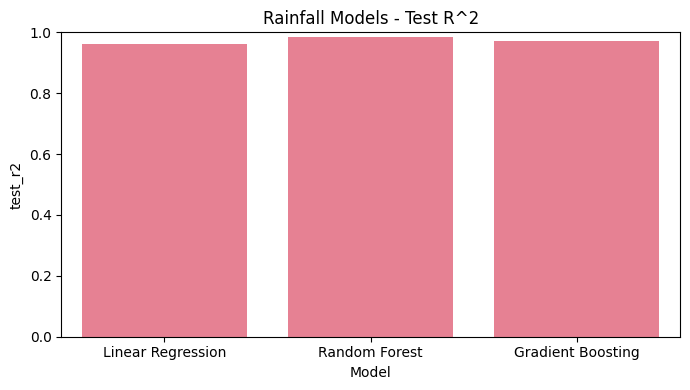

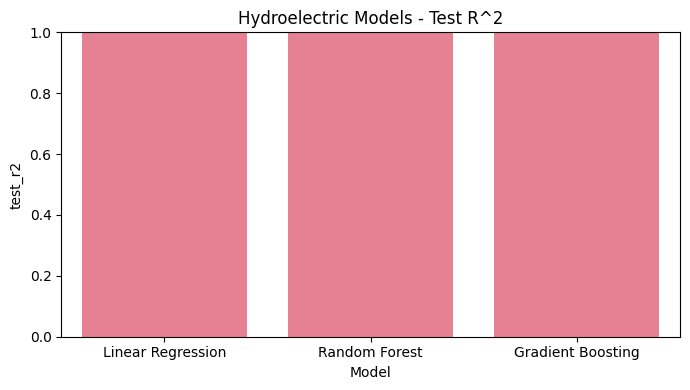

In [66]:
# VISUALIZATION: Model Performance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Rainfall performance
rf_perf = pd.DataFrame({k: {m: v[m] for m in ['test_r2','test_rmse','test_mae']} for k, v in rainfall_models.items()}).T.reset_index().rename(columns={'index':'Model'})
plt.figure(figsize=(7,4))
sns.barplot(data=rf_perf, x='Model', y='test_r2')
plt.title('Rainfall Models - Test R^2')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Hydroelectric performance
hy_perf = pd.DataFrame({k: {m: v[m] for m in ['test_r2','test_rmse','test_mae']} for k, v in hydro_models.items()}).T.reset_index().rename(columns={'index':'Model'})
plt.figure(figsize=(7,4))
sns.barplot(data=hy_perf, x='Model', y='test_r2')
plt.title('Hydroelectric Models - Test R^2')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()
